In [2]:
import glob
import os
from astropy.io import fits
import numpy as np

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')
geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]
seddir = '/orange/adamginsburg/w51/TaehwaYoo/SEDmodel/'

b3fluxarr = np.array([]) ; b6fluxarr = np.array([])
b7fluxarr = np.array([])
logmassarr = np.array([]) ; logtemparr = np.array([]) ; loglumarr = np.array([])
logradarr = np.array([])
for path in geometry: # loop over YSO geometry models
    filepath = seddir+path+'/flux_prop.fits'
   
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    
    
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    parfilepath = '/blue/adamginsburg/richardson.t/research/flux/pars/'+ path +'_augmented.fits'
    parfile = fits.open(parfilepath)
    # correction of fluxes considering distances 1kpc -> 5.41 kpc (w51e)
    # select 4th value of the aperture grid = 428 au
    
    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    b7flux = fluxfile[1].data['b7 flux'][:,3]*1e-3*(1/5.41)**2

    
    
    masslos = fluxfile[1].data['mass_los'][:,3]
    logmass = np.log10(masslos)
    templos = fluxfile[1].data['temp_los'][:,3]
    logtemp = np.log10(templos)
    luminosity = parfile[1].data['Model Luminosity']
    loglum = np.log10(luminosity)
    radius = parfile[1].data['star.radius']
    lograd = np.log10(radius)
    
    logb3flux = np.log10(b3flux) 
    logb6flux = np.log10(b6flux)
    logb7flux = np.log10(b7flux)
    
    
    logtemparr = np.append(logtemparr, logtemp)
    logmassarr = np.append(logmassarr, logmass)
    loglumarr = np.append(loglumarr, loglum)
    logradarr = np.append(logradarr, lograd)
    
    b3fluxarr = np.append(b3fluxarr,logb3flux)
    b6fluxarr = np.append(b6fluxarr,logb6flux)
    b7fluxarr = np.append(b7fluxarr,logb7flux)
    
b3fluxarr.flatten()
b6fluxarr.flatten()
b7fluxarr.flatten()
logmassarr.flatten()
logtemparr.flatten()
loglumarr.flatten()
logradarr.flatten()


s-pbsmi


/scratch/local/63830109/ipykernel_9508/732712000.py:38: RuntimeWarning: invalid value encountered in log10
  logmass = np.log10(masslos)
/scratch/local/63830109/ipykernel_9508/732712000.py:40: RuntimeWarning: invalid value encountered in log10
  logtemp = np.log10(templos)


s-p-hmi
spu-hmi


/scratch/local/63830109/ipykernel_9508/732712000.py:38: RuntimeWarning: divide by zero encountered in log10
  logmass = np.log10(masslos)


spubsmi
s-pbhmi
s-u-smi
s-ubhmi


/scratch/local/63830109/ipykernel_9508/732712000.py:46: RuntimeWarning: invalid value encountered in log10
  logb3flux = np.log10(b3flux)
/scratch/local/63830109/ipykernel_9508/732712000.py:47: RuntimeWarning: invalid value encountered in log10
  logb6flux = np.log10(b6flux)
/scratch/local/63830109/ipykernel_9508/732712000.py:48: RuntimeWarning: invalid value encountered in log10
  logb7flux = np.log10(b7flux)


spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


array([ 0.17231097,  0.17231097,  0.17231097, ..., -0.85917782,
        1.83903787,  1.75027692])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
index = np.where((np.isfinite(b3fluxarr))&
                 (np.isfinite(b7fluxarr))&
                 (np.isfinite(b6fluxarr))&
                 (np.isfinite(loglumarr)))[0]
X = np.vstack((b3fluxarr[index], b6fluxarr[index]-b3fluxarr[index],b7fluxarr[index]-b6fluxarr[index] )).T
y = logradarr[index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [4]:
model = RandomForestRegressor(n_estimators=500, max_depth=20,oob_score=True, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6270440018477602

[ 0.43948258  0.02265432 -0.85493792 ... -0.34988266 -0.32612949
  0.8224151 ]
[ 0.58035466 -0.34486157 -0.97428462 ... -0.53253989  0.60508946
  0.28262211]


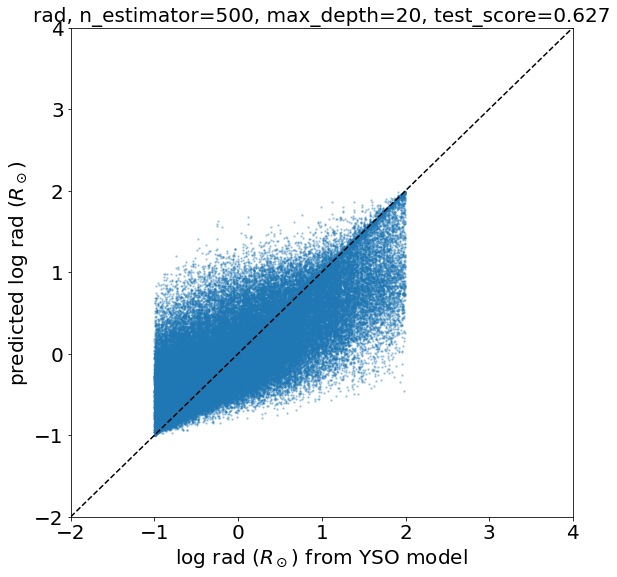

In [5]:
import matplotlib.pyplot as plt
print(model.predict(X_test))
print(y_test)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.labelsize']=20

fig = plt.figure(figsize=(9,9))
plt.scatter(y_test, model.predict(X_test),s=2,alpha=0.3)
plt.plot([-2,4],[-2,4], c='k', ls='dashed')
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.xlabel(r'log rad ($R_\odot$) from YSO model')
plt.ylabel(r'predicted log rad ($R_\odot$)')
plt.title('rad, n_estimator=%d, max_depth=%d, test_score=%4.3f'%(model.n_estimators,model.max_depth,model.score(X_test, y_test)))
plt.savefig('rad_20_band7_1to1.png')          
          
          

In [2]:
print(loglumarr)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
index = np.where((np.isfinite(b3fluxarr))&
                 (np.isfinite(b7fluxarr))&
                 (np.isfinite(b6fluxarr))&
                 (np.isfinite(loglumarr)))[0]
X = np.vstack((b3fluxarr[index], b6fluxarr[index]-b3fluxarr[index],b7fluxarr[index]-b6fluxarr[index] )).T
y = loglumarr[index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


[ 1.07151206  1.07151206  1.07151206 ... -3.11718314  5.18091924
  4.64590429]


In [ ]:
model = RandomForestRegressor(n_estimators=500, max_depth=20,oob_score=True, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
print(model.predict(X_test))
print(y_test)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.labelsize']=20

fig = plt.figure(figsize=(9,9))
plt.scatter(y_test, model.predict(X_test),s=2,alpha=0.3)
plt.plot([-4,7],[-4,7], c='k', ls='dashed')
plt.xlim(-4,7)
plt.ylim(-4,7)
plt.xlabel(r'log lum ($L_\odot$) from YSO model')
plt.ylabel(r'predicted log lum ($L_\odot$)')
plt.title('lum, n_estimator=%d, max_depth=%d, test_score=%4.3f'%(model.n_estimators,model.max_depth,model.score(X_test, y_test)))
plt.savefig('lum_20_band7_1to1.png')          
          
          

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

index = np.where((np.isfinite(logmassarr))&(np.isfinite(b3fluxarr))
                 &(np.isfinite(b6fluxarr))
                 &(np.isfinite(b7fluxarr)))[0]
    #                 (np.isnan(logmass)==False)&
    #                 
    #                 &(np.isnan(b6flux)==False)&(np.isnan(b3flux)==False))[0]
print(np.min(y[index]),np.max(y[index]))
X_train, X_test, y_train, y_test = train_test_split(X[index,:], y[index], random_state=0)


-14.352937679749402 1.2903874764587544


In [38]:
model = RandomForestRegressor(n_estimators=500, max_depth=20, oob_score=True, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9744261658079503

Text(0.5, 1.0, 'mass_los, n_estimator=500, max_depth=20, test_score=0.974')

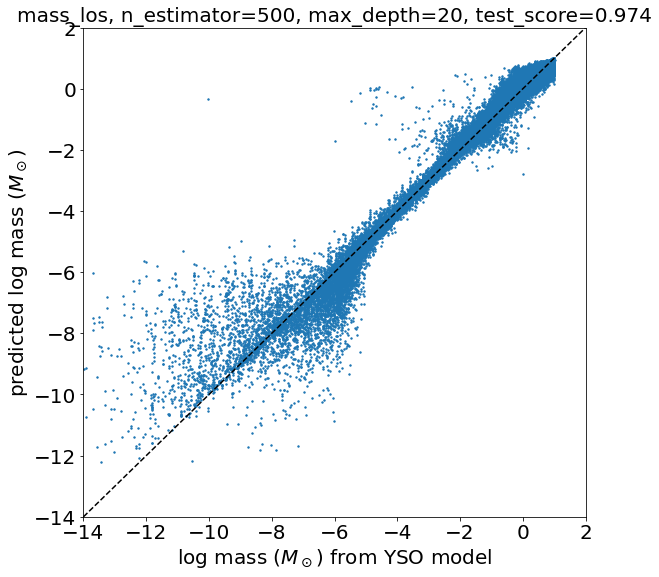

In [39]:
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.labelsize']=20

fig = plt.figure(figsize=(9,9))
plt.scatter(y_test, model.predict(X_test),s=2)
plt.plot([-14,2],[-14,2], c='k', ls='dashed')
plt.xlim(-14,2)
plt.ylim(-14,2)
plt.xlabel(r'log mass ($M_\odot$) from YSO model')
plt.ylabel(r'predicted log mass ($M_\odot$)')
plt.title('mass_los, n_estimator=%d, max_depth=%d, test_score=%4.3f'%(model.n_estimators,model.max_depth,model.score(X_test, y_test)))


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
index = np.where((np.isfinite(logtemparr))&(np.isfinite(b3fluxarr))
                 &(np.isfinite(b6fluxarr))
                 &(np.isfinite(b7fluxarr)))[0]

print(np.min(y[index]),np.max(y[index]))
X_train, X_test, y_train, y_test = train_test_split(X[index,:], y2[index], random_state=0)


-14.352937679749402 1.2903874764587544


In [41]:
model2 = RandomForestRegressor(n_estimators=500, max_depth=20,oob_score=True, n_jobs=-1)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.7929335841434958

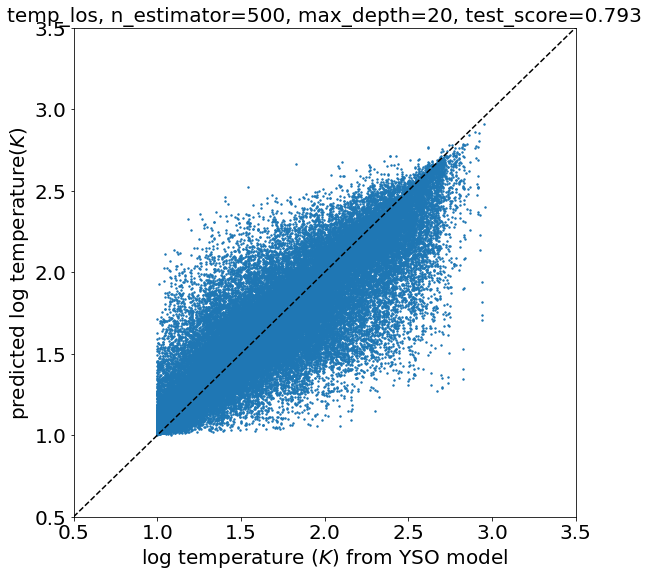

In [ ]:

plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.labelsize']=20

fig = plt.figure(figsize=(9,9))
plt.scatter(y_test, model2.predict(X_test),s=2)
plt.plot([0.5,3.5],[0.5,3.5], c='k', ls='dashed')
plt.xlim(0.5,3.5)
plt.ylim(0.5,3.5)
plt.title('temp_los, n_estimator=%d, max_depth=%d, test_score=%4.3f'%(model2.n_estimators,model2.max_depth,model2.score(X_test, y_test)))
plt.xlabel(r'log temperature ($K$) from YSO model')
plt.ylabel(r'predicted log temperature($K$)')
plt.savefig('temp_20_band7_1to1.png')  

